#### DNN에 시간 개념을 적용한 것
- 나중에 배울 Transformer에는 RNN처럼 이전 정보를 전달하지 않는다(?)

- A에서 상태 정보(기억되어 있는 상태)를 전달한다.
- 우측 그림은 왼쪽 그림을 쪼갠 것으로 매 time(t)마다 DNN을 가지고 있다.
- 현재 시점의 출력 데이터와 이전 시점의 상태 정보를 가지고 현재 시점의 출력을 뽑아낸다

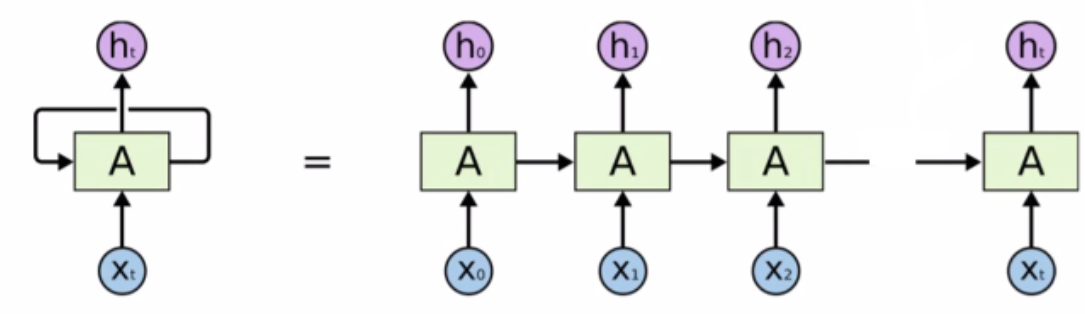

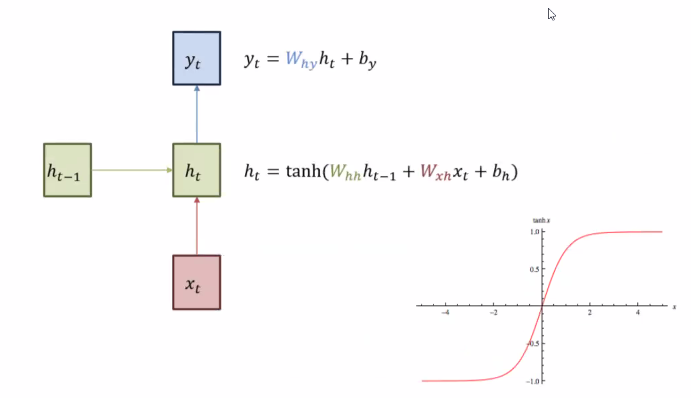

### 입출력에 따른 분류
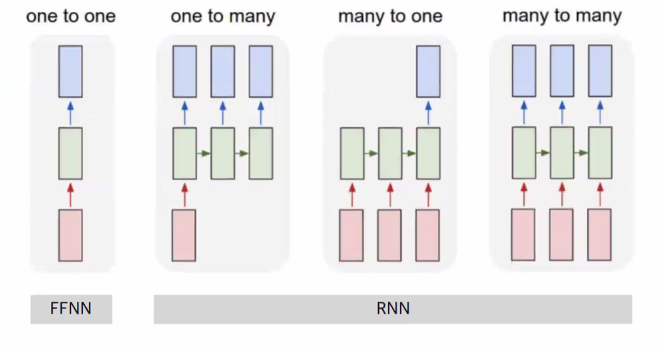
- one to many : 이미지를 주고 text의 sequence를 찾는 문제
- many to one : 단어의 sequence를 주고 감정을 찾는 문제
- many to many : 기계번역, 챗봇

In [1]:
import torch
import numpy as np

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
# declare dimension
input_size = 4
hidden_size = 2

In [4]:
# singleton example
# shape : (1, 1, 4)
# input_data_np = np.array([[[1, 0, 0, 0]]])

# sequential example
# shape : (3, 5, 4)
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]
input_data_np = np.array([[h, e, l, l, o], [e, o, l, l, l], [l, l, e, e, l]], dtype=np.float32)

In [5]:
# transform as torch tensor
input_data = torch.Tensor(input_data_np)

In [6]:
# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size)

In [7]:
# check output
outputs, _status = rnn(input_data)
print(outputs)
print(outputs.size())

tensor([[[-0.7497, -0.6135],
         [-0.5282, -0.2473],
         [-0.9136, -0.4269],
         [-0.9136, -0.4269],
         [-0.9028,  0.1180]],

        [[-0.5753, -0.0070],
         [-0.9052,  0.2597],
         [-0.9173, -0.1989],
         [-0.9173, -0.1989],
         [-0.8996, -0.2725]],

        [[-0.9077, -0.3205],
         [-0.8944, -0.2902],
         [-0.5134, -0.0288],
         [-0.5134, -0.0288],
         [-0.9127, -0.2222]]], grad_fn=<StackBackward>)
torch.Size([3, 5, 2])


### LSTM
- long-short term memory
- rnn의 `gradient banishing`을 방지. rnn은 long term을 잘 기억하지 못한다
- RNN vs LSTM
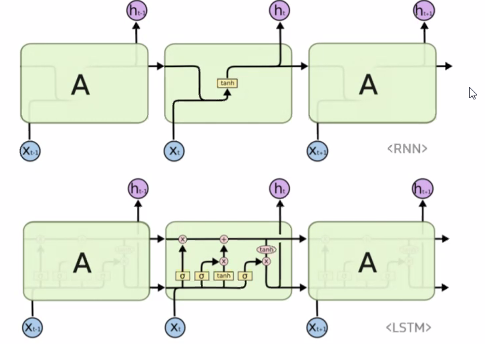

- LSTM은 원하는 GATE만 열어서(많이 혹은 적게) 가중치를 조절한다
- 공식은 패스 -

### GRU
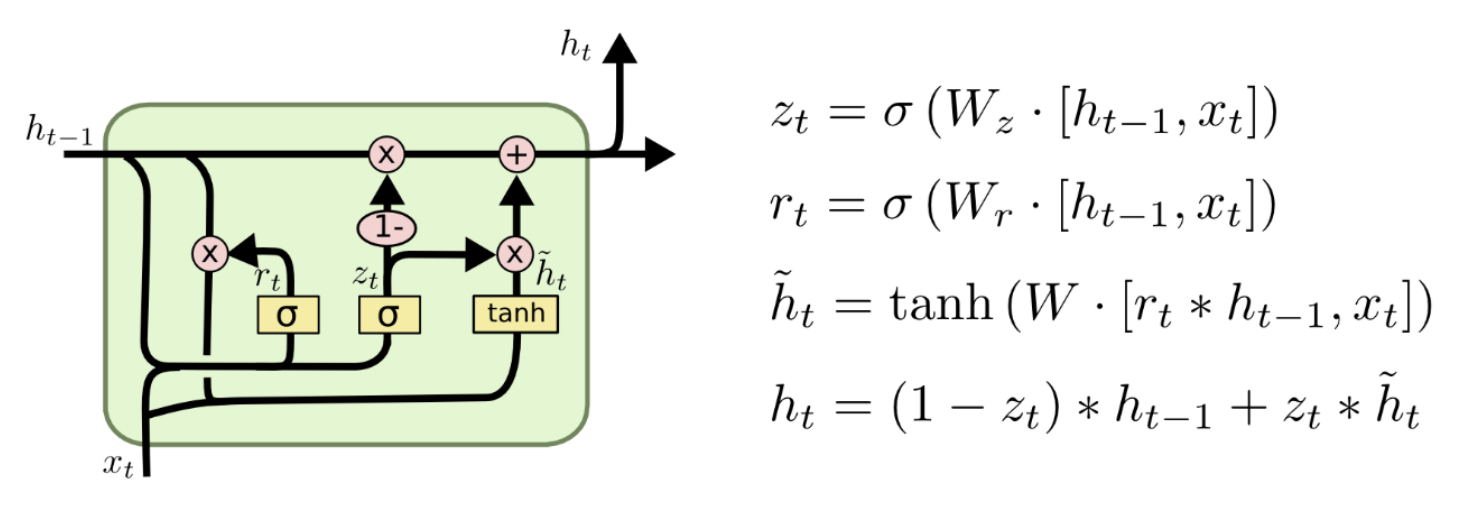